In [ ]:
# Playground Series S5E12

https://www.kaggle.com/competitions/playground-series-s5e12/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', 26)
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
# データの読み込み
train = pd.read_csv('../input/playground-series-s5e12/train.csv')
test = pd.read_csv('../input/playground-series-s5e12/test.csv')
sample_submission = pd.read_csv('../input/playground-series-s5e12/sample_submission.csv')

In [ ]:
print('Train Shape:', train.shape)
print('Test Shape:', test.shape)

In [3]:
train.head(10)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0
5,5,42,1,100,4.4,6.4,5.3,25.5,0.84,111,67,77,174,42,101,95,Female,White,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
6,6,41,2,148,3.4,5.6,3.7,27.9,0.89,130,77,73,168,41,106,137,Female,White,Graduate,Lower-Middle,Current,Employed,0,0,0,1.0
7,7,51,3,102,4.0,7.3,5.5,27.1,0.83,125,82,66,182,45,105,132,Male,Asian,Highschool,Low,Never,Employed,1,0,0,1.0
8,8,34,2,44,2.7,7.0,7.9,22.6,0.81,120,79,65,163,68,69,97,Male,White,Highschool,Lower-Middle,Never,Employed,0,0,0,0.0
9,9,44,1,36,5.8,5.7,6.6,29.3,0.88,110,65,66,171,48,97,153,Male,Hispanic,Highschool,Middle,Never,Employed,1,0,0,1.0


In [6]:
train['education_level'].unique()

array(['Highschool', 'Graduate', 'Postgraduate', 'No formal'],
      dtype=object)

In [8]:
train['income_level'].unique()

array(['Lower-Middle', 'Upper-Middle', 'Low', 'Middle', 'High'],
      dtype=object)

In [7]:
train['smoking_status'].unique()

array(['Current', 'Never', 'Former'], dtype=object)

In [8]:
train['employment_status'].unique()

array(['Employed', 'Retired', 'Student', 'Unemployed'], dtype=object)

In [9]:
display(train.value_counts())

id      age  alcohol_consumption_per_week  physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  screen_time_hours_per_day  bmi   waist_to_hip_ratio  systolic_bp  diastolic_bp  heart_rate  cholesterol_total  hdl_cholesterol  ldl_cholesterol  triglycerides  gender  ethnicity  education_level  income_level  smoking_status  employment_status  family_history_diabetes  hypertension_history  cardiovascular_history  diagnosed_diabetes
0       31   1                             45                                  7.7         6.8                  6.1                        33.4  0.93                112          70            62          199                58               114              102            Female  Hispanic   Highschool       Lower-Middle  Current         Employed           0                        0                     0                       1.0                   1
466669  70   2                             74                                  4.7         4.7       

In [ ]:
train.describe()

In [10]:
# ============================================================================
# 目的変数と特徴量の設定
# ============================================================================
TARGET = 'diagnosed_diabetes'

# 除外する列
EXCLUDE = ['id', TARGET]

# ベース特徴量（idと目的変数を除く）
BASE = [col for col in train.columns if col not in EXCLUDE]

# カテゴリ変数（文字列型）
CATS = train[BASE].select_dtypes(include=['object']).columns.tolist()

# 数値変数（カテゴリ変数以外）
NUMS = [col for col in BASE if col not in CATS]

print("=" * 60)
print("特徴量の分類")
print("=" * 60)
print(f'  - ベース特徴量数: {len(BASE)}')
print(f'  - カテゴリ変数: {len(CATS)} → {CATS}')
print(f'  - 数値変数: {len(NUMS)} → {NUMS}')
print("=" * 60)

特徴量の分類
  - ベース特徴量数: 24
  - カテゴリ変数: 6 → ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
  - 数値変数: 18 → ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']


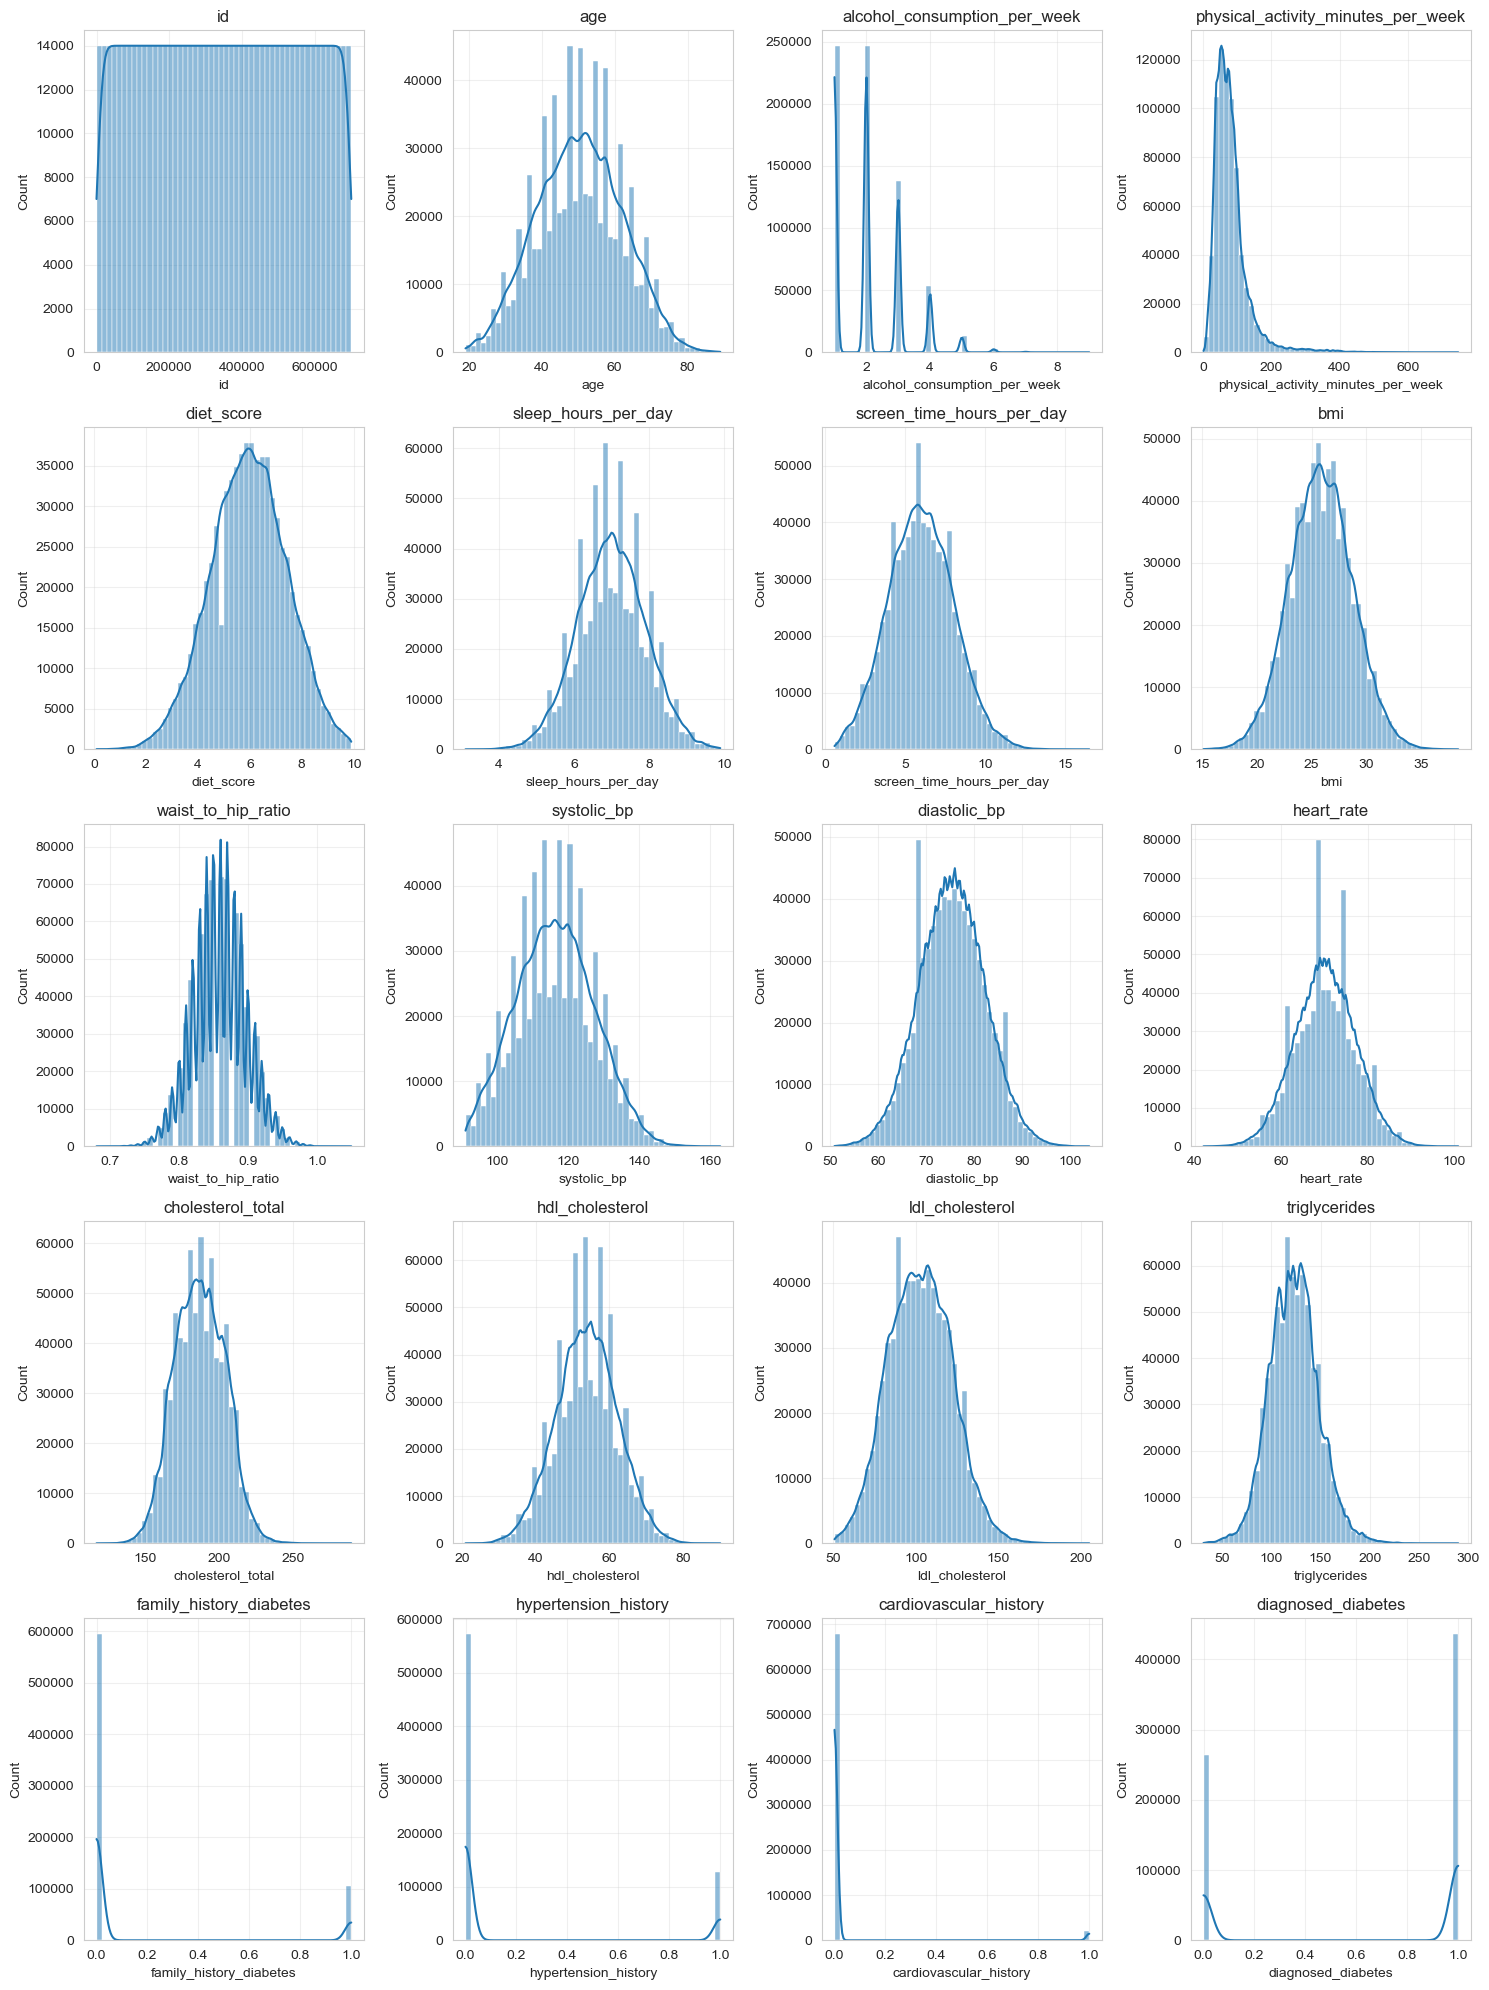

In [11]:
# 数値列のみを取得
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()

# 図のサイズとレイアウトを決定
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# 図を作成
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

# 各列をヒストグラムで可視化
for i, col in enumerate(numeric_cols):
    sns.histplot(data=train, x=col, bins=50, ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].grid(True, alpha=0.3)

# 余ったサブプロットを非表示
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [12]:
print('NaN Count:', train[CATS].isnull().sum().sum(), '\n')
print(train[CATS].nunique(),'\n')
train[CATS].head(10)

NaN Count: 0 

gender               3
ethnicity            5
education_level      4
income_level         5
smoking_status       3
employment_status    4
dtype: int64 



,gender,ethnicity,education_level,income_level,smoking_status,employment_status
0,Female,Hispanic,Highschool,Lower-Middle,Current,Employed
1,Female,White,Highschool,Upper-Middle,Never,Employed
2,Male,Hispanic,Highschool,Lower-Middle,Never,Retired
3,Female,White,Highschool,Lower-Middle,Current,Employed
4,Male,White,Highschool,Upper-Middle,Never,Retired
5,Female,White,Highschool,Lower-Middle,Never,Retired
6,Female,White,Graduate,Lower-Middle,Current,Employed
7,Male,Asian,Highschool,Low,Never,Employed
8,Male,White,Highschool,Lower-Middle,Never,Employed
9,Male,Hispanic,Highschool,Middle,Never,Employed


In [13]:
print('NaN Count:', train[NUMS].isnull().sum().sum(), '\n')
print(train[NUMS].nunique(),'\n')
train[NUMS].head(10)

NaN Count: 0 

age                                    71
alcohol_consumption_per_week            9
physical_activity_minutes_per_week    565
diet_score                             99
sleep_hours_per_day                    69
screen_time_hours_per_day             151
bmi                                   231
waist_to_hip_ratio                     36
systolic_bp                            71
diastolic_bp                           54
heart_rate                             60
cholesterol_total                     154
hdl_cholesterol                        69
ldl_cholesterol                       151
triglycerides                         228
family_history_diabetes                 2
hypertension_history                    2
cardiovascular_history                  2
dtype: int64 



,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,0,0,0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,0,0,0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,0,0,0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,0,1,0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,0,1,0
5,42,1,100,4.4,6.4,5.3,25.5,0.84,111,67,77,174,42,101,95,0,0,0
6,41,2,148,3.4,5.6,3.7,27.9,0.89,130,77,73,168,41,106,137,0,0,0
7,51,3,102,4.0,7.3,5.5,27.1,0.83,125,82,66,182,45,105,132,1,0,0
8,34,2,44,2.7,7.0,7.9,22.6,0.81,120,79,65,163,68,69,97,0,0,0
9,44,1,36,5.8,5.7,6.6,29.3,0.88,110,65,66,171,48,97,153,1,0,0


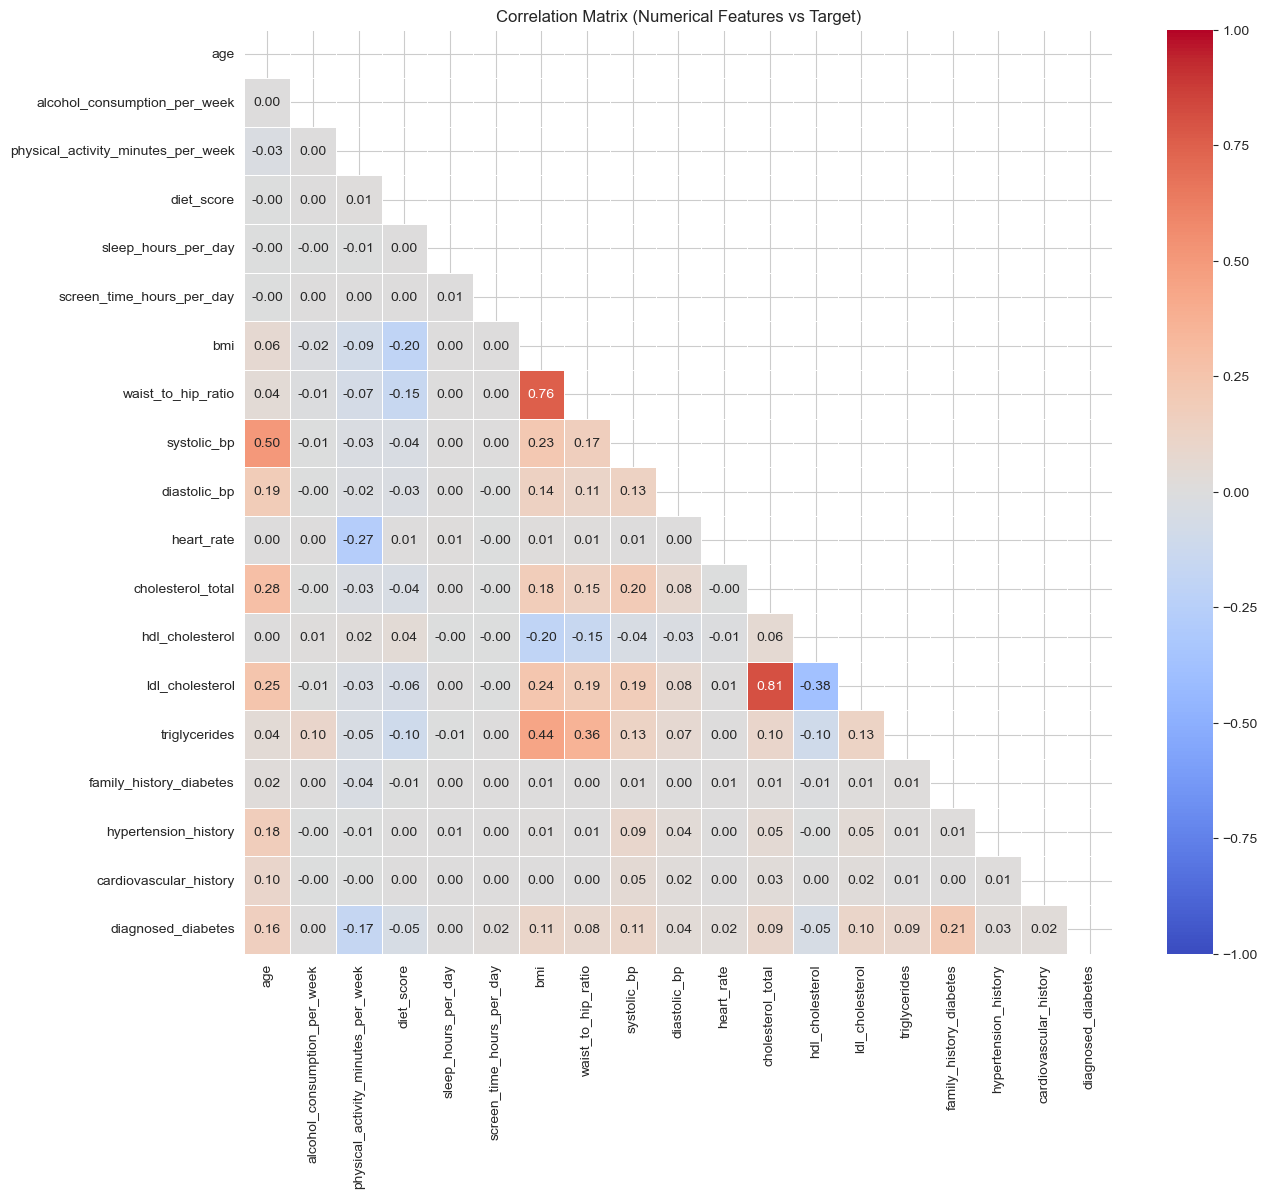

In [14]:
corr_features = NUMS + [TARGET]
corr_matrix = train[corr_features].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", 
            cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix (Numerical Features vs Target)')
plt.show()

In [26]:
# ============================================================================
# 特定のカテゴリ変数のラベルエンコーディング（Label Encoding）
# ============================================================================
from sklearn.preprocessing import LabelEncoder

# エンコーディング対象のカラム
encode_cols = ['gender', 'ethnicity', 'employment_status']

# 存在するカラムのみを対象にする
encode_cols = [col for col in encode_cols if col in train.columns]

label_encoders = {}
for col in encode_cols:
    le = LabelEncoder()
    # trainとtestを結合してfit（新しいカテゴリに対応）
    combined = pd.concat([train[col], test[col]], ignore_index=True).astype(str)
    le.fit(combined)
    
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))
    label_encoders[col] = le
    
    print(f"✅ {col} をラベルエンコーディングしました")
    print(f"   カテゴリ数: {len(le.classes_)}")
    print(f"   カテゴリ: {le.classes_.tolist()}\n")

print(f"✅ 合計 {len(encode_cols)}個のカラムをラベルエンコーディングしました")

✅ gender をラベルエンコーディングしました
   カテゴリ数: 3
   カテゴリ: ['0', '1', '2']

✅ ethnicity をラベルエンコーディングしました
   カテゴリ数: 5
   カテゴリ: ['0', '1', '2', '3', '4']

✅ employment_status をラベルエンコーディングしました
   カテゴリ数: 4
   カテゴリ: ['0', '1', '2', '3']

✅ 合計 3個のカラムをラベルエンコーディングしました


In [15]:
train.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [16]:
# ============================================================================
# 順序エンコーディング（Ordinal Encoding）
# ============================================================================
education_map = {
    "No formal": 0,
    "Highschool": 1,
    "Graduate": 2,
    "Postgraduate": 3
}

income_map = {
    "Low": 0,
    "Lower-Middle": 1,
    "Middle": 2,
    "Upper-Middle": 3,
    "High": 4
}

smoking_map = {
    "Never": 0,
    "Former": 1,
    "Current": 2
}

ordinal_cols = {
    "education_level": education_map,
    "income_level": income_map,
    "smoking_status": smoking_map,
}

for col, mapping in ordinal_cols.items():
    if col in train.columns:
        train[col] = train[col].map(mapping)
        test[col] = test[col].map(mapping)
        print(f"✅ {col} を順序エンコーディングしました")
    else:
        print(f"⚠️ {col} はデータに存在しません")

print(f"\n✅ 順序エンコーディング完了")

✅ education_level を順序エンコーディングしました
✅ income_level を順序エンコーディングしました
✅ smoking_status を順序エンコーディングしました

✅ 順序エンコーディング完了


In [17]:
train.head(15)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,Female,Hispanic,1,1,2,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,Female,White,1,3,0,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,Male,Hispanic,1,1,0,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,Female,White,1,1,2,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,Male,White,1,3,0,Retired,0,1,0,1.0
5,5,42,1,100,4.4,6.4,5.3,25.5,0.84,111,67,77,174,42,101,95,Female,White,1,1,0,Retired,0,0,0,0.0
6,6,41,2,148,3.4,5.6,3.7,27.9,0.89,130,77,73,168,41,106,137,Female,White,2,1,2,Employed,0,0,0,1.0
7,7,51,3,102,4.0,7.3,5.5,27.1,0.83,125,82,66,182,45,105,132,Male,Asian,1,0,0,Employed,1,0,0,1.0
8,8,34,2,44,2.7,7.0,7.9,22.6,0.81,120,79,65,163,68,69,97,Male,White,1,1,0,Employed,0,0,0,0.0
9,9,44,1,36,5.8,5.7,6.6,29.3,0.88,110,65,66,171,48,97,153,Male,Hispanic,1,2,0,Employed,1,0,0,1.0


In [27]:
# エンコーディング後のデータ確認
print("=" * 60)
print("エンコーディング後のデータ型確認")
print("=" * 60)
print(f"\nカテゴリ変数のデータ型:")
for col in ['gender', 'ethnicity', 'employment_status', 'education_level', 'income_level', 'smoking_status']:
    if col in train.columns:
        print(f"  {col}: {train[col].dtype}")

print(f"\n欠損値の確認:")
missing_count = train[BASE].isnull().sum()
if missing_count.sum() > 0:
    print(missing_count[missing_count > 0])
else:
    print("  欠損値なし ✅")


エンコーディング後のデータ型確認

カテゴリ変数のデータ型:
  gender: object
  ethnicity: object
  employment_status: object
  education_level: int64
  income_level: int64
  smoking_status: int64

欠損値の確認:
  欠損値なし ✅


In [28]:
# ============================================================================
# 特徴量と目的変数の準備
# ============================================================================
X_train = train[BASE]
y_train = train[TARGET]
X_test = test[BASE]

print("=" * 60)
print("データの準備")
print("=" * 60)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print("=" * 60)


データの準備
X_train shape: (700000, 24)
y_train shape: (700000,)
X_test shape: (300000, 24)


In [31]:
# ============================================================================
# LightGBMモデルの学習（5分割交差検証）
# ============================================================================
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

# 5分割交差検証の設定
N_FOLDS = 5
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=42)

# LightGBMのパラメータ
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state': 42
}

# エンコーディング済みのカテゴリ変数（数値型になっている）
# gender, ethnicity, employment_statusはラベルエンコーディング済み
# education_level, income_level, smoking_statusは順序エンコーディング済み
categorical_features = ['gender', 'ethnicity', 'employment_status', 
                        'education_level', 'income_level', 'smoking_status']
# 存在するカラムのみをフィルタ
categorical_features = [col for col in categorical_features if col in X_train.columns]

for col in categorical_features:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype('category')
        X_test[col] = X_test[col].astype('category')

# 交差検証の結果を保存
cv_scores = []
models = []
oof_predictions = np.zeros(len(X_train))
test_predictions = np.zeros(len(X_test))

print("=" * 60)
print(f"{N_FOLDS}分割交差検証を開始します")
print("=" * 60)

# 各フォールドで学習
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print(f"\n{'='*60}")
    print(f"Fold {fold}/{N_FOLDS}")
    print(f"{'='*60}")
    
    # データの分割
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    print(f"Train shape: {X_tr.shape}, Valid shape: {X_val.shape}")
    
    # データセットの作成
    train_data = lgb.Dataset(X_tr, label=y_tr, categorical_feature=categorical_features)
    valid_data = lgb.Dataset(X_val, label=y_val, categorical_feature=categorical_features, reference=train_data)
    
    # 学習
    model = lgb.train(
        params,
        train_data,
        valid_sets=[train_data, valid_data],
        valid_names=['train', 'valid'],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50, verbose=True),
            lgb.log_evaluation(100)
        ]
    )
    
    # 検証データでの予測
    y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)
    val_auc = roc_auc_score(y_val, y_pred_val)
    cv_scores.append(val_auc)
    
    # OOF予測を保存
    oof_predictions[val_idx] = y_pred_val
    
    # テストデータでの予測
    y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)
    test_predictions += y_pred_test / N_FOLDS
    
    # モデルを保存
    models.append(model)
    
    print(f"Fold {fold} AUC: {val_auc:.5f}")

# 結果の表示
print("\n" + "=" * 60)
print("交差検証の結果")
print("=" * 60)
print(f"各FoldのAUC:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.5f}")
print(f"\n平均AUC: {np.mean(cv_scores):.5f} (+/- {np.std(cv_scores):.5f})")
print("=" * 60)

# 全体のOOF AUC
oof_auc = roc_auc_score(y_train, oof_predictions)
print(f"\n全体のOOF AUC: {oof_auc:.5f}")

# 検証データとして最後のフォールドの予測を使用（可視化用）
y_pred_val = oof_predictions[val_idx]
y_val = y_train.iloc[val_idx]


5分割交差検証を開始します

Fold 1/5
Train shape: (560000, 24), Valid shape: (140000, 24)
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.718959	valid's auc: 0.71748
[200]	train's auc: 0.726655	valid's auc: 0.722906
[300]	train's auc: 0.731256	valid's auc: 0.724982
[400]	train's auc: 0.734783	valid's auc: 0.725683
[500]	train's auc: 0.737882	valid's auc: 0.726196
[600]	train's auc: 0.740706	valid's auc: 0.726392
[700]	train's auc: 0.74344	valid's auc: 0.726594
[800]	train's auc: 0.746376	valid's auc: 0.726953
[900]	train's auc: 0.749089	valid's auc: 0.727191
[1000]	train's auc: 0.751555	valid's auc: 0.727322
Did not meet early stopping. Best iteration is:
[999]	train's auc: 0.751536	valid's auc: 0.727326
Fold 1 AUC: 0.72733

Fold 2/5
Train shape: (560000, 24), Valid shape: (140000, 24)
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.719563	valid's auc: 0.715448
[200]	train's auc: 0.727668	valid's auc: 0.721252
[300]	train's auc: 0.

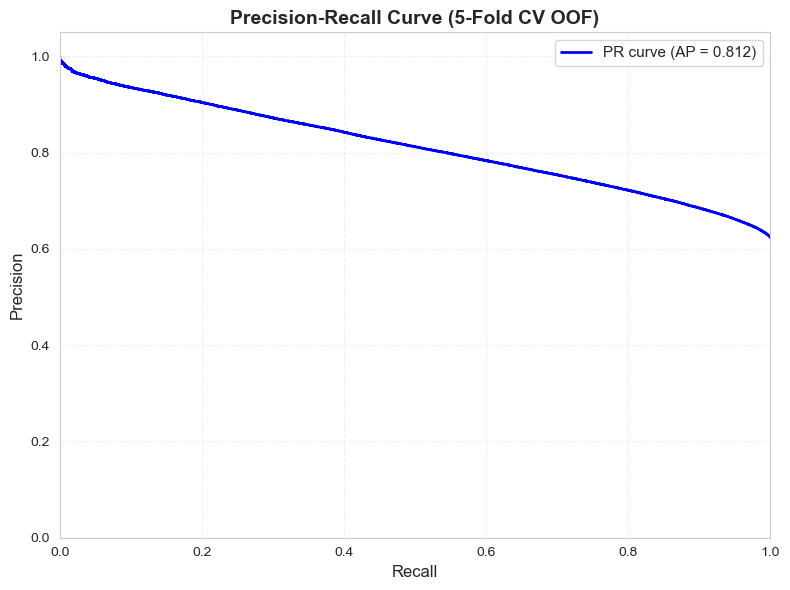

Average Precision (AP): 0.812
Precision range: [0.623, 1.000]
Recall range: [0.000, 1.000]

※ 5分割交差検証のOOF予測を使用しています


In [32]:
# ============================================================================
# Precision-Recall Curveの可視化（OOF予測を使用）
# ============================================================================
from sklearn.metrics import precision_recall_curve, average_precision_score

# OOF予測全体を使用（5分割交差検証の全予測）
precision, recall, thresholds = precision_recall_curve(y_train, oof_predictions)
ap_score = average_precision_score(y_train, oof_predictions)

# グラフの描画
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2, color='blue', label=f'PR curve (AP = {ap_score:.3f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve (5-Fold CV OOF)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='best', fontsize=11, frameon=True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.show()

print(f"Average Precision (AP): {ap_score:.3f}")
print(f"Precision range: [{precision.min():.3f}, {precision.max():.3f}]")
print(f"Recall range: [{recall.min():.3f}, {recall.max():.3f}]")
print(f"\n※ 5分割交差検証のOOF予測を使用しています")


In [33]:
# ============================================================================
# テストデータで予測と提出ファイルの作成
# ============================================================================
# 交差検証で計算したテスト予測を使用（各フォールドの平均）
# test_predictionsは既にCell 22で計算済み

# 提出ファイルの作成
submission = pd.DataFrame({
    'id': test['id'],
    'diagnosed_diabetes': test_predictions
})

# 保存
submission.to_csv('../submissions/submission_playground_s5e12_cv5.csv', index=False)

print("=" * 60)
print("提出ファイルを作成しました")
print("=" * 60)
print(f"\n提出ファイルの形状: {submission.shape}")
print(f"\n予測値の統計:")
print(submission['diagnosed_diabetes'].head())
print(f"\n最初の5行:")
print(submission.head())
print(f"\n保存先: ../submissions/submission_playground_s5e12_cv5.csv")
print(f"\n※ 5分割交差検証の各フォールドの予測の平均を使用しています")


提出ファイルを作成しました

提出ファイルの形状: (300000, 2)

予測値の統計:
0    0.492350
1    0.657133
2    0.775434
3    0.371813
4    0.918981
Name: diagnosed_diabetes, dtype: float64

最初の5行:
       id  diagnosed_diabetes
0  700000            0.492350
1  700001            0.657133
2  700002            0.775434
3  700003            0.371813
4  700004            0.918981

保存先: ../submissions/submission_playground_s5e12_cv5.csv

※ 5分割交差検証の各フォールドの予測の平均を使用しています


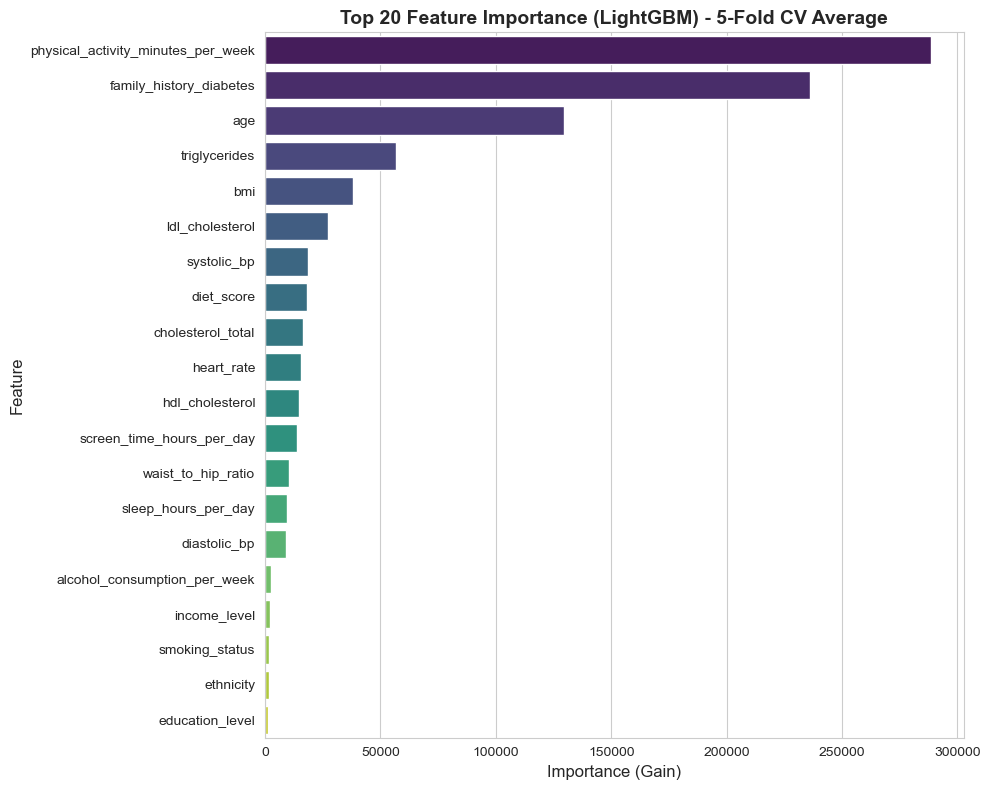

Top 10 特徴量（全フォールドの平均）:
                           feature    importance
physical_activity_minutes_per_week 288353.790597
           family_history_diabetes 236013.406211
                               age 129417.071098
                     triglycerides  56557.828608
                               bmi  38281.232583
                   ldl_cholesterol  27429.848658
                       systolic_bp  18730.742502
                        diet_score  17981.317860
                 cholesterol_total  16463.232916
                        heart_rate  15551.529055


In [34]:
# ============================================================================
# 特徴量重要度の可視化（全フォールドの平均）
# ============================================================================
# 全フォールドの特徴量重要度の平均を計算
feature_importance_dict = {feat: 0 for feat in BASE}
for model in models:
    importances = model.feature_importance(importance_type='gain')
    for feat, imp in zip(BASE, importances):
        feature_importance_dict[feat] += imp / len(models)

feature_importance = pd.DataFrame({
    'feature': BASE,
    'importance': [feature_importance_dict[feat] for feat in BASE]
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature', palette='viridis')
plt.title('Top 20 Feature Importance (LightGBM) - 5-Fold CV Average', fontsize=14, fontweight='bold')
plt.xlabel('Importance (Gain)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("=" * 60)
print("Top 10 特徴量（全フォールドの平均）:")
print("=" * 60)
print(feature_importance.head(10).to_string(index=False))


In [ ]:
# ============================================================================
# Optuna による LightGBM のハイパーパラメータチューニング + submission.csv 作成
# ============================================================================
import optuna
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

print("=" * 60)
print("Optuna によるハイパーパラメータチューニングを開始します")
print("=" * 60)

# 5-fold CV の設定
N_FOLDS_OPT = 5
skf_opt = StratifiedKFold(n_splits=N_FOLDS_OPT, shuffle=True, random_state=42)

# カテゴリ特徴量
categorical_features_opt = ['gender', 'ethnicity', 'employment_status',
                            'education_level', 'income_level', 'smoking_status']
categorical_features_opt = [c for c in categorical_features_opt if c in BASE]

# コピーして dtype を category に変換
X_train_opt = train[BASE].copy()
X_test_opt = test[BASE].copy()
for col in categorical_features_opt:
    X_train_opt[col] = X_train_opt[col].astype('category')
    X_test_opt[col] = X_test_opt[col].astype('category')

y_train_opt = train[TARGET].copy()


def objective(trial):
    """Optuna 用 objective 関数（5-fold CV の平均 AUC を最大化）"""
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 16, 256),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 10.0),
        'random_state': 42,
        'verbose': -1,
    }

    cv_scores = []

    for train_idx, val_idx in skf_opt.split(X_train_opt, y_train_opt):
        X_tr, X_val = X_train_opt.iloc[train_idx], X_train_opt.iloc[val_idx]
        y_tr, y_val = y_train_opt.iloc[train_idx], y_train_opt.iloc[val_idx]

        train_data = lgb.Dataset(X_tr, label=y_tr, categorical_feature=categorical_features_opt)
        valid_data = lgb.Dataset(X_val, label=y_val, categorical_feature=categorical_features_opt, reference=train_data)

        model = lgb.train(
            params,
            train_data,
            valid_sets=[valid_data],
            valid_names=['valid'],
            num_boost_round=1000,
            callbacks=[
                lgb.early_stopping(stopping_rounds=50, verbose=False),
            ],
        )

        y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)
        auc = roc_auc_score(y_val, y_pred_val)
        cv_scores.append(auc)

    return np.mean(cv_scores)


# Study 実行（試行回数は必要に応じて変更してください）
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best AUC:", study.best_value)
print("Best params:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

# ベストパラメータで 5-fold 再学習 + テスト予測
best_params = study.best_params.copy()
best_params.update({
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'random_state': 42,
    'verbose': -1,
})

print("\nベストパラメータで再学習し、テストデータを予測します")

test_pred_opt = np.zeros(len(X_test_opt))

for fold, (train_idx, val_idx) in enumerate(skf_opt.split(X_train_opt, y_train_opt), 1):
    X_tr, X_val = X_train_opt.iloc[train_idx], X_train_opt.iloc[val_idx]
    y_tr, y_val = y_train_opt.iloc[train_idx], y_train_opt.iloc[val_idx]

    train_data = lgb.Dataset(X_tr, label=y_tr, categorical_feature=categorical_features_opt)
    valid_data = lgb.Dataset(X_val, label=y_val, categorical_feature=categorical_features_opt, reference=train_data)

    model = lgb.train(
        best_params,
        train_data,
        valid_sets=[valid_data],
        valid_names=['valid'],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50, verbose=False),
        ],
    )

    y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)
    fold_auc = roc_auc_score(y_val, y_pred_val)
    print(f"Fold {fold} AUC (best params): {fold_auc:.5f}")

    test_pred_opt += model.predict(X_test_opt, num_iteration=model.best_iteration) / N_FOLDS_OPT

# submission.csv を既存の提出ファイルと同じディレクトリに保存
submission_opt = pd.DataFrame({
    'id': test['id'],
    'diagnosed_diabetes': test_pred_opt
})

submission_path = '../submissions/submission.csv'
submission_opt.to_csv(submission_path, index=False)

print("\n" + "=" * 60)
print(f"Optuna チューニング結果を用いた submission.csv を保存しました: {submission_path}")
print("=" * 60)


Optuna によるハイパーパラメータチューニングを開始します


[I 2025-12-07 01:11:54,757] A new study created in memory with name: no-name-17aa6fc5-a36e-4cfe-813b-a6d4285b044e
